# Forwards Player Analysis

Which forwards performed historically well over the last 3 seasons (2020/21 - 2022/23)? Well, it's complicated - players move around positions e.g. a player who was a forward and is now a midfielder such as Bryan Mbuemo. Obviously, the points earned by a player depend on their position - midfielders get 5 points for a goal whereas forwards get only 4. To overcome this, I will use 3 methods to rank the best 15 players from the last 3 seasons:

* **Method 1:** Take this season's forwards, and look at their average points over the last 3 seasons regardless of position. This is the "naive" method.
* **Method 2:** Take this season's forwards, and look at their average points over the last 3 seasons only if they also played as forwards in those seasons. This is the "strict forwards" approach.
* **Method 3:** Take this season's forwards, and map their stats over the last 3 seasons to the points they would've scored if they were a forward. This will require me to discard bonus points as these are scored differently per position and depend on the bps scored by all other players in the fixture. At this point, that is too complicated to account for.

I will then compare the top 15 forwards as measured by these methods (using their average total points - bonus points). Since we are discarding the bonus points, what matters here is the rank rather than the actual average points scored.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from convert_points import convert_points

# Read and pre-process data

## 2023/24 data

In [2]:
path_2023_24 = '../data/Fantasy-Premier-League/data/2023-24/gws/merged_gw.csv'
data_2023_24 = pd.read_csv(path_2023_24, low_memory = False)
data_2023_24.loc[:,'total - bonus points'] = data_2023_24.total_points - data_2023_24.bonus
FWDs_2023_24 = data_2023_24.loc[data_2023_24.position == 'FWD', 'name'].unique()
data_2023_24

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total - bonus points
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0.0,0,0,0,0,40,True,0,1,0
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,0.0,0,0,0,0,45,True,0,1,0
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,8.0,1,0,0,0,70,True,0,1,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0.0,0,0,0,0,40,True,0,1,0
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,17.0,2,0,0,0,55,True,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,Kyle Walker,DEF,Man City,6.2,0,0,20,0,46.3,369,...,11.0,2,282609,315193,32584,51,False,0,3,2
1934,Jacob Brown,FWD,Luton,1.5,0,0,-2,0,0.3,631,...,9.0,0,-124,2500,2624,50,False,1,3,0
1935,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,227,...,0.0,0,-7273,968,8241,45,False,0,3,0
1936,Braian Ojeda Rodríguez,MID,Nott'm Forest,0.0,0,0,0,0,0.0,459,...,0.0,0,-73,0,73,45,False,0,3,0


## 2020/21 - 2022/23 data

In [3]:
data_2020_23_path = '../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_2020_23_path, low_memory = False)
seasons = ['2020-21', '2021-22', '2022-23']
data_2020_23_df = seasons_df.loc[seasons_df.season_x.isin(seasons),:]
data_2020_23_df.position = data_2020_23_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})
FWDs_2020_23_data = data_2020_23_df.loc[data_2020_23_df.name.isin(FWDs_2023_24),:]
FWDs_2020_23_data.loc[:,'total - bonus points'] = FWDs_2020_23_data.total_points - FWDs_2020_23_data.bonus
FWDs_2020_23_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_1384\2913249710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_23_df.position = data_2020_23_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})
C:\Users\Andrew\AppData\Local\Temp\ipykernel_1384\2913249710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FWDs_2020_23_data.loc[:,'total - bonus points'] = FWDs_2020_23_data.total_points - FWDs_2020_23_data.bonus


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total - bonus points
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,32.0,1,0,0,0,55,True,0,1,1
19867,2020-21,Aleksandar Mitrović,FWD,Fulham,0,0,3,0,0.3,184,...,7.0,1,0,0,0,60,True,0,1,1
19912,2020-21,Callum Wilson,FWD,Newcastle,0,2,32,1,23.3,506,...,50.0,8,0,0,0,65,False,0,1,6
19938,2020-21,Danny Ings,FWD,Southampton,0,0,1,0,11.2,366,...,60.0,2,0,0,0,85,False,0,1,2
19958,2020-21,Dominic Calvert-Lewin,FWD,Everton,0,2,34,1,13.7,164,...,34.0,8,0,0,0,70,False,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96106,2022-23,Danny Ings,FWD,West Ham,1,0,3,0,0.0,30,...,0.0,3,1118,4009,2891,63,False,1,38,3
96115,2022-23,Odsonne Edouard,FWD,Crystal Palace,0,0,4,0,0.0,166,...,0.0,2,12844,18089,5245,50,True,0,38,2
96123,2022-23,Deniz Undav,FWD,Brighton,0,0,23,0,0.0,123,...,0.0,5,-13569,4263,17832,50,False,1,38,5
96134,2022-23,Jhon Durán,FWD,Aston Villa,0,0,0,0,0.0,711,...,0.0,0,-126,174,300,55,True,0,38,0


# Method 1 (Naive)

Look at this season's forwards' historical performance over the last 3 years (2020/21 - 2022/23), regardless of the position they played in those seasons. This is the "naive" approach.

## Which players had the highest median score from 2020/21 - 2022/23?

As seen in the points distributions per position plots, the total points scored by forwards have a right skew. Outliers can inflate the mean compared to the median which is more robust.

In [4]:
top_15_FWDs_med = FWDs_2020_23_data.loc[:,['name','total_points', 'total - bonus points']].groupby(['name']).median()
top_15_FWDs_med.sort_values(by = 'total - bonus points', ascending = False, inplace = True)
top_15_FWDs_med = top_15_FWDs_med.iloc[0:15,:]
top_15_FWDs_med

,total_points,total - bonus points
name,,
Erling Haaland,6.0,6.0
Harry Kane,6.0,5.0
Cody Gakpo,2.5,2.5
Chris Wood,2.0,2.0
Ivan Toney,2.0,2.0
Dominic Solanke,2.0,2.0
Danny Ings,2.0,2.0
Gabriel Fernando de Jesus,2.0,2.0
Michail Antonio,2.0,2.0


So it turns out the median is a fairly useless metric, besides showing that Haaland and Kane are practically in a league of their own.

## Which players had the highest mean score from 2020/21 - 2022/23?

In [5]:
top_15_FWDs_mean = FWDs_2020_23_data.loc[:,['name','total_points', 'total - bonus points']].groupby(['name']).mean()
top_15_FWDs_mean.sort_values(by = 'total - bonus points', ascending = False, inplace = True)
top_15_FWDs_mean = top_15_FWDs_mean.iloc[0:15,:]
top_15_FWDs_mean

,total_points,total - bonus points
name,,
Erling Haaland,7.157895,6.105263
Harry Kane,6.114035,5.140351
Cody Gakpo,4.090909,3.909091
Ollie Watkins,4.157895,3.631579
Ivan Toney,4.223684,3.513158
Dominic Solanke,3.421053,3.052632
Daniel Jebbison,3.000000,2.750000
Gabriel Fernando de Jesus,3.157895,2.728070
Callum Wilson,3.210526,2.719298


In [6]:
top_15_FWD_names = list(top_15_FWDs_mean.index)
top_15_FWD_names

['Erling Haaland',
 'Harry Kane',
 'Cody Gakpo',
 'Ollie Watkins',
 'Ivan Toney',
 'Dominic Solanke',
 'Daniel Jebbison',
 'Gabriel Fernando de Jesus',
 'Callum Wilson',
 'Michail Antonio',
 'Danny Ings',
 'Yoane Wissa',
 'Darwin Núñez Ribeiro',
 'Alexander Isak',
 'Julián Álvarez']

##  How many matches did these players play?

In [7]:
matches_played = FWDs_2020_23_data.loc[:,['name','GW']].groupby('name').size()
matches_played = matches_played.loc[top_15_FWD_names]
matches_played.name = 'GWs played'
top_15_FWDs_mean = top_15_FWDs_mean.join(matches_played)
top_15_FWDs_mean

,total_points,total - bonus points,GWs played
name,,,
Erling Haaland,7.157895,6.105263,38
Harry Kane,6.114035,5.140351,114
Cody Gakpo,4.090909,3.909091,22
Ollie Watkins,4.157895,3.631579,114
Ivan Toney,4.223684,3.513158,76
Dominic Solanke,3.421053,3.052632,38
Daniel Jebbison,3.000000,2.750000,4
Gabriel Fernando de Jesus,3.157895,2.728070,114
Callum Wilson,3.210526,2.719298,114


## Extract points data for each of these players and generate boxplots:

In [8]:
points_data = []
for name in top_15_FWD_names:
    points_data.append(FWDs_2020_23_data.loc[FWDs_2020_23_data.name == name,'total - bonus points'].values.astype(float))

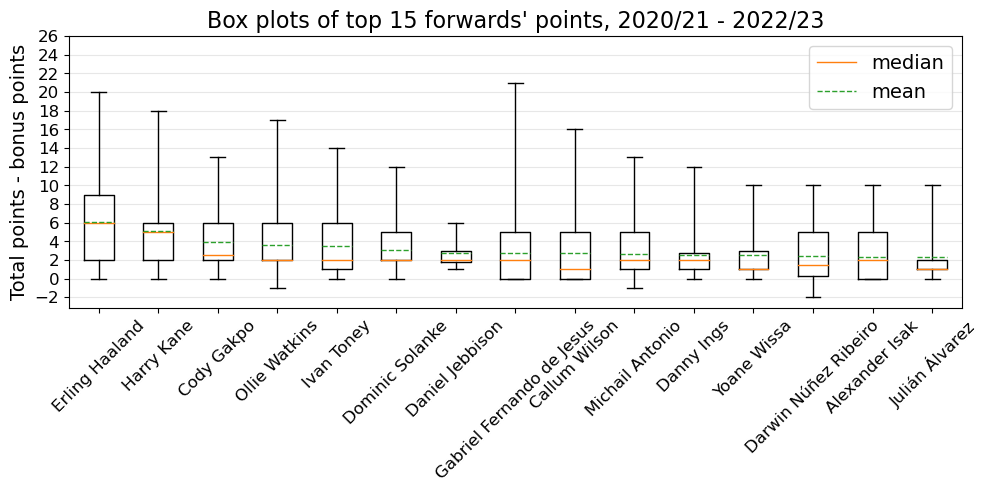

In [9]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
box_dict = ax.boxplot(points_data, whis=(0,100), labels = top_15_FWD_names, meanline = True, showmeans = True)
_ = ax.set_xticklabels(ax.get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
_ = ax.set_yticks(np.arange(-2,28,2))
_ = ax.set_yticklabels(ax.get_yticklabels(), fontsize = axis_tick_font)
ax.set_ylabel('Total points - bonus points', fontsize = axis_label_font)
ax.grid(axis = 'y', alpha = 0.3)
ax.legend([box_dict['medians'][0], box_dict['means'][0]], ['median', 'mean'], fontsize = legend_font)
ax.set_title('''Box plots of top 15 forwards' points, 2020/21 - 2022/23''', fontsize = axis_title_font)
fig.tight_layout(pad=1.0)
plt.savefig('./plots/top_15_FWDs_boxplots.png', bbox_inches = 'tight')
plt.show()

## Method 1 Summary Results

We won't look at how these points are scored yet, because again that depends on position. We will wait to see the discrepancies between the 3 methods before investigating how they scored the points.

So, overall, the best 15 players ranked by their total - bonus points irrespective of position is:

In [10]:
method_1_results = top_15_FWDs_mean.copy()
method_1_results

,total_points,total - bonus points,GWs played
name,,,
Erling Haaland,7.157895,6.105263,38
Harry Kane,6.114035,5.140351,114
Cody Gakpo,4.090909,3.909091,22
Ollie Watkins,4.157895,3.631579,114
Ivan Toney,4.223684,3.513158,76
Dominic Solanke,3.421053,3.052632,38
Daniel Jebbison,3.000000,2.750000,4
Gabriel Fernando de Jesus,3.157895,2.728070,114
Callum Wilson,3.210526,2.719298,114


# Method 2 (Strict Forwards)

Select only players that are forwards this season and played as forwards in the last 3 seasons.

In [11]:
strict_FWDs = FWDs_2020_23_data.loc[FWDs_2020_23_data.position == 'FWD', :]
strict_FWDs

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,total - bonus points
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,32.0,1,0,0,0,55,True,0,1,1
19867,2020-21,Aleksandar Mitrović,FWD,Fulham,0,0,3,0,0.3,184,...,7.0,1,0,0,0,60,True,0,1,1
19912,2020-21,Callum Wilson,FWD,Newcastle,0,2,32,1,23.3,506,...,50.0,8,0,0,0,65,False,0,1,6
19938,2020-21,Danny Ings,FWD,Southampton,0,0,1,0,11.2,366,...,60.0,2,0,0,0,85,False,0,1,2
19958,2020-21,Dominic Calvert-Lewin,FWD,Everton,0,2,34,1,13.7,164,...,34.0,8,0,0,0,70,False,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96106,2022-23,Danny Ings,FWD,West Ham,1,0,3,0,0.0,30,...,0.0,3,1118,4009,2891,63,False,1,38,3
96115,2022-23,Odsonne Edouard,FWD,Crystal Palace,0,0,4,0,0.0,166,...,0.0,2,12844,18089,5245,50,True,0,38,2
96123,2022-23,Deniz Undav,FWD,Brighton,0,0,23,0,0.0,123,...,0.0,5,-13569,4263,17832,50,False,1,38,5
96134,2022-23,Jhon Durán,FWD,Aston Villa,0,0,0,0,0.0,711,...,0.0,0,-126,174,300,55,True,0,38,0


## Which players had the highest mean score from 2020/21 to 2022/23?

In [12]:
top_15_FWDs_mean = strict_FWDs.loc[:,['name','total_points', 'total - bonus points']].groupby(['name']).mean()
top_15_FWDs_mean.sort_values(by = 'total - bonus points', ascending = False, inplace = True)
top_15_FWDs_mean = top_15_FWDs_mean.iloc[0:15,:]
top_15_FWDs_mean

,total_points,total - bonus points
name,,
Erling Haaland,7.157895,6.105263
Harry Kane,6.114035,5.140351
Ollie Watkins,4.157895,3.631579
Ivan Toney,4.223684,3.513158
Dominic Solanke,3.421053,3.052632
Daniel Jebbison,3.000000,2.750000
Gabriel Fernando de Jesus,3.157895,2.728070
Callum Wilson,3.210526,2.719298
Michail Antonio,3.000000,2.675439


In [13]:
top_15_FWD_names = list(top_15_FWDs_mean.index)
top_15_FWD_names

['Erling Haaland',
 'Harry Kane',
 'Ollie Watkins',
 'Ivan Toney',
 'Dominic Solanke',
 'Daniel Jebbison',
 'Gabriel Fernando de Jesus',
 'Callum Wilson',
 'Michail Antonio',
 'Danny Ings',
 'Darwin Núñez Ribeiro',
 'Alexander Isak',
 'Julián Álvarez',
 'Chris Wood',
 'Taiwo Awoniyi']

## How many GWs did they play?

In [14]:
matches_played = strict_FWDs.loc[:,['name','GW']].groupby('name').size()
matches_played = matches_played.loc[top_15_FWD_names]
matches_played.name = 'GWs played'
top_15_FWDs_mean = top_15_FWDs_mean.join(matches_played)
top_15_FWDs_mean

,total_points,total - bonus points,GWs played
name,,,
Erling Haaland,7.157895,6.105263,38
Harry Kane,6.114035,5.140351,114
Ollie Watkins,4.157895,3.631579,114
Ivan Toney,4.223684,3.513158,76
Dominic Solanke,3.421053,3.052632,38
Daniel Jebbison,3.000000,2.750000,4
Gabriel Fernando de Jesus,3.157895,2.728070,114
Callum Wilson,3.210526,2.719298,114
Michail Antonio,3.000000,2.675439,114


## Method 2 Summary Results

In [15]:
method_2_results = top_15_FWDs_mean.copy()
method_2_results

,total_points,total - bonus points,GWs played
name,,,
Erling Haaland,7.157895,6.105263,38
Harry Kane,6.114035,5.140351,114
Ollie Watkins,4.157895,3.631579,114
Ivan Toney,4.223684,3.513158,76
Dominic Solanke,3.421053,3.052632,38
Daniel Jebbison,3.000000,2.750000,4
Gabriel Fernando de Jesus,3.157895,2.728070,114
Callum Wilson,3.210526,2.719298,114
Michail Antonio,3.000000,2.675439,114


outer join top 15 FWDs from 2020/21 - 2022/23 and 2023/24. 1 column for points in first 3 seasons and 1 column for points this season. Calculate effect size and p-values. Then join with their current value and calculate their points/per million. Use this to identify value players.

Actually, maybe take all FWDs this season and use this to filter forwards from 2020/21 to 2022/23. Because we don't really care about their historic stats - we're trying to identify good players to select this season based on their historic performance over the last 3 seasons. so re-run whole analysis with this in mind, being careful of convert_points which may require multiple calls based on position. Then join this seasons data and continue from there.